Malware Label distribution:
Malware Label
Malicious    557
Benign       494
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

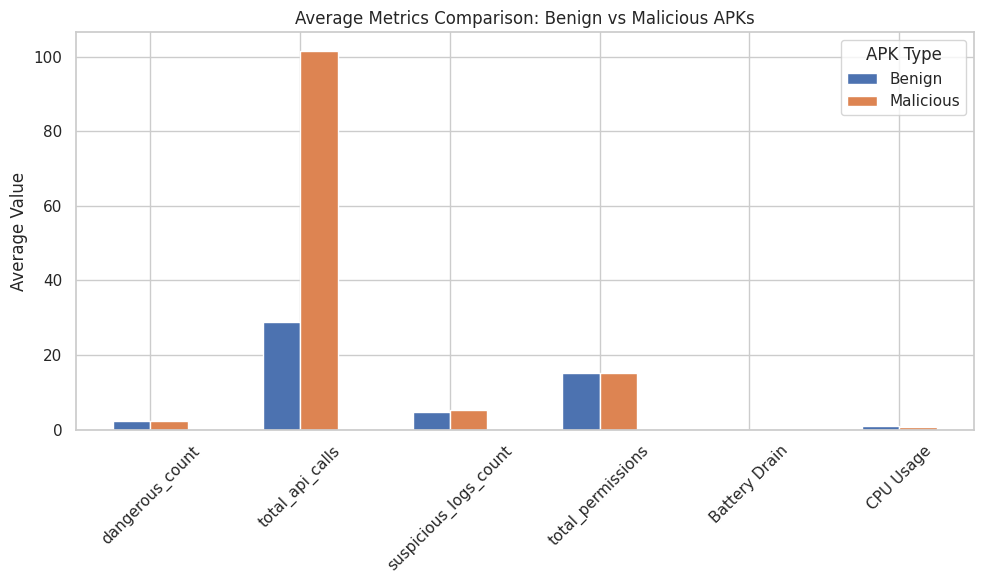

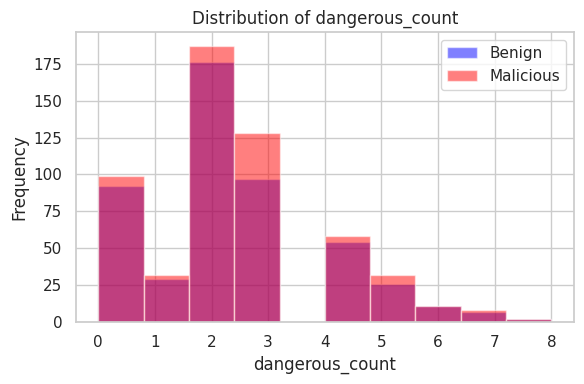

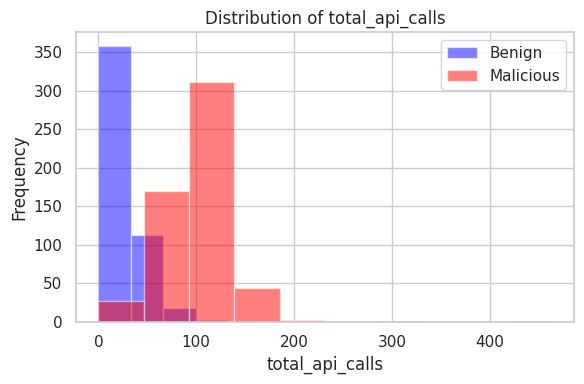

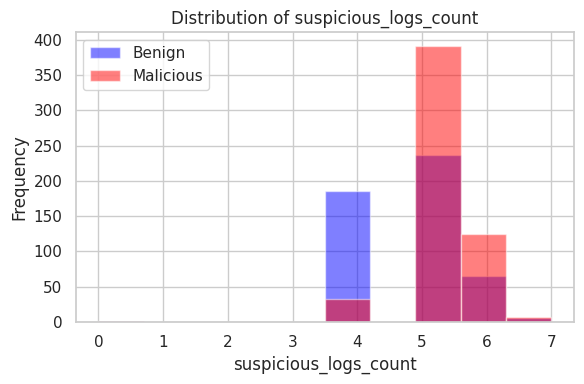

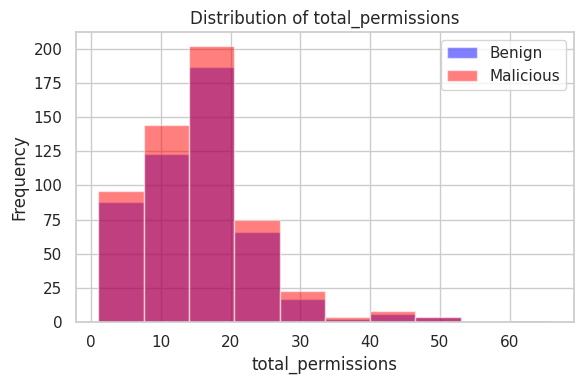

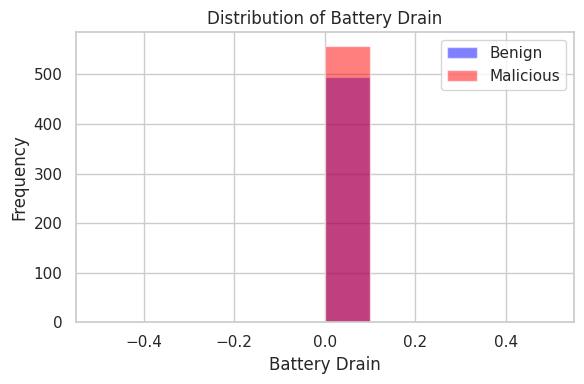

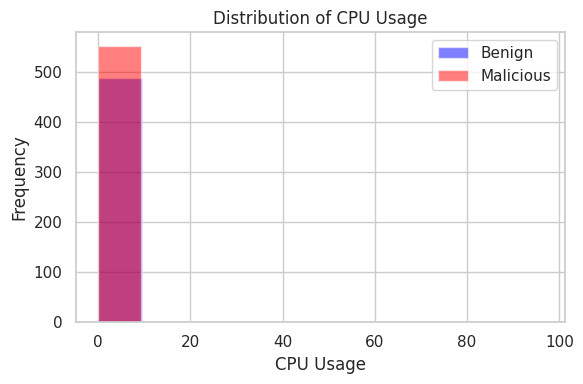

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CSV file
df = pd.read_csv("/home/john/MaliciousAPKDetection/Output/Dynamic/malware_data.csv")

# 2. Convert JSON-like string columns to dictionaries/lists
df['Permissions Analysis'] = df['Permissions Analysis'].apply(ast.literal_eval)
df['API Calls'] = df['API Calls'].apply(ast.literal_eval)
df['Suspicious Logs'] = df['Suspicious Logs'].apply(ast.literal_eval)

# 3. Extract additional metrics from the parsed dictionaries/lists
df['dangerous_count'] = df['Permissions Analysis'].apply(lambda d: len(d.get('dangerous', [])))
df['total_permissions'] = df['Permissions Analysis'].apply(lambda d: d.get('total', 0))
df['total_api_calls'] = df['API Calls'].apply(lambda d: sum(d.values()))
df['suspicious_logs_count'] = df['Suspicious Logs'].apply(lambda lst: len(lst))

# 4. Convert malware label (0 = benign, 1 = malicious)
#    Adjust this lambda if your labels are stored differently
df['Malware Label'] = df['Malware (Label)'].apply(lambda x: 'Malicious' if x == 1 else 'Benign')

# 5. Check how many benign vs malicious samples are in the dataset
print("Malware Label distribution:")
print(df['Malware Label'].value_counts())

# 6. If malicious data exists, proceed with plotting
if 'Malicious' not in df['Malware Label'].unique():
    print("\nWARNING: No malicious data found in the dataset.")
    print("Make sure 'Malware (Label)' has 1 for malicious samples.")
else:
    sns.set(style="whitegrid")
    
    # List of metrics to visualize
    metrics = ['dangerous_count', 'total_api_calls', 'suspicious_logs_count', 
               'total_permissions', 'Battery Drain', 'CPU Usage']
    
    # 7A. Grouped Bar Chart for Average Values of Each Metric by Malware Label
    agg_metrics = df.groupby('Malware Label')[metrics].mean().T
    plt.figure(figsize=(10,6))
    agg_metrics.plot(kind='bar', figsize=(10,6))
    plt.title('Average Metrics Comparison: Benign vs Malicious APKs')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.legend(title='APK Type')
    plt.tight_layout()
    plt.show()
    
    # 7B. Histograms for Each Metric by APK Type
    for metric in metrics:
        plt.figure(figsize=(6,4))
        # Plot histogram for Benign
        df[df['Malware Label'] == 'Benign'][metric].hist(alpha=0.5, label='Benign', color='blue')
        # Plot histogram for Malicious
        df[df['Malware Label'] == 'Malicious'][metric].hist(alpha=0.5, label='Malicious', color='red')
        plt.title(f'Distribution of {metric}')
        plt.xlabel(metric)
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()
